<a href="https://colab.research.google.com/github/rishabhparsediya7/Imagr-Augmentation/blob/main/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
np.random.seed(1) #to have reproducible results 
pd.set_option('display.max_colwidth', None)

In [ ]:
paths=glob.glob('/gdrive/My Drive/LeafImages/color/Grape*/*.JPG',recursive=True)
len(paths)

4062

In [ ]:
paths=random.sample(paths,20)
paths

['/gdrive/My Drive/LeafImages/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/754505a9-a4d3-4dc4-a136-b55389b80b76___FAM_L.Blight 1698.JPG',
 '/gdrive/My Drive/LeafImages/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/6f4c065f-76da-4dd6-ad90-fa5df84af0a2___FAM_L.Blight 1649.JPG',
 '/gdrive/My Drive/LeafImages/color/Grape___Black_rot/e4049ecb-7ff1-4bdf-a6e9-d99ad5d4d690___FAM_B.Rot 3492.JPG',
 '/gdrive/My Drive/LeafImages/color/Grape___Black_rot/6d315a9e-3773-473c-bb88-64160bc7f480___FAM_B.Rot 3273.JPG',
 '/gdrive/My Drive/LeafImages/color/Grape___healthy/a889fb1b-e7cb-4026-a42e-a09558e00ca8___Mt.N.V_HL 9020.JPG',
 '/gdrive/My Drive/LeafImages/color/Grape___Esca_(Black_Measles)/a43df234-9dde-408c-a6ad-9d7787b32447___FAM_B.Msls 0848.JPG',
 '/gdrive/My Drive/LeafImages/color/Grape___healthy/862c537a-d751-47bd-9c2c-385f7e9a9e97___Mt.N.V_HL 6054.JPG',
 '/gdrive/My Drive/LeafImages/color/Grape___Esca_(Black_Measles)/7b179702-2225-4942-8ef9-6acb6e80a373___FAM_B.Msls 4052.JPG',
 '/gdrive/My

In [ ]:
orig=np.array([np.asarray(Image.open(img)) for img in paths])
orig.shape

(20, 256, 256, 3)

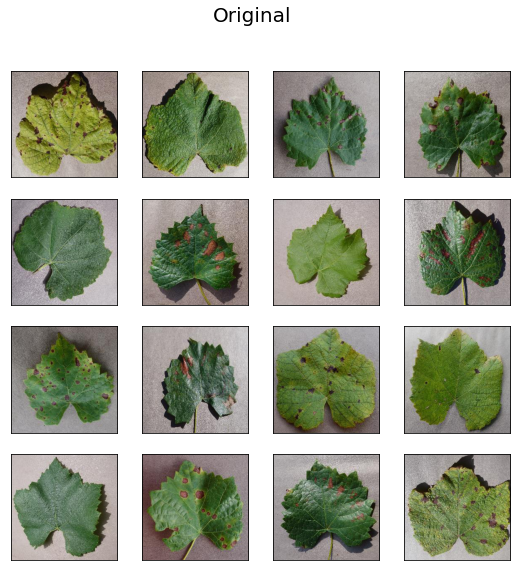

In [ ]:
plt.figure(figsize=(9,9))
i=0
for img in orig[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Original",fontsize=20)
plt.show()

In [ ]:
contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB'))
.enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in orig]

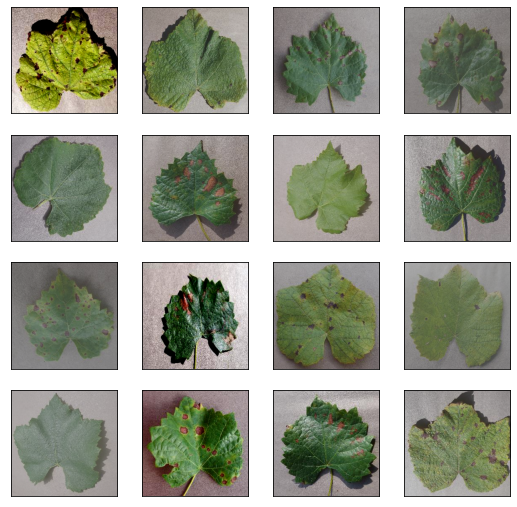

In [ ]:
plt.figure(figsize=(9,9))
i = 0
for img in contrast[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast]
sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness]
color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness]

In [ ]:
flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color]

In [ ]:
rotate = [Image.fromarray(img, 'RGB').rotate(np.random.choice([0, 90, 180, 270])) for img in flip]

In [ ]:
import os
for i, image in tqdm(enumerate(rotate)):
    directory = paths[i].rsplit('/', 3)[0] + '/augmented/' + paths[i].rsplit('/', 2)[1]+ '/'
    os.makedirs(directory, exist_ok = True)
    image.save(directory + paths[i].rsplit('/', 2)[2])